# **Milestone 4**

Descriptions - To be done

## Preparation Steps

In [1]:
# Import all necessary python packages

import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset

df = pd.read_csv('input/walmart-dataset/Walmart.csv')


## <font color = 'blue'> 1. Inspecting the Dataset </font>


In [3]:
# Inspect dataset structure
print('Dataset structure:')
print(df.info())


Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [4]:
# Check data types
print('\nData types:')
print(df.dtypes)



Data types:
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [5]:
# Summarize numerical columns
print('\nSummary statistics:')
print(df.describe())


Summary statistics:
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.23

In [6]:
# Check for missing values
print('\nMissing values:')
print(df.isnull().sum())


Missing values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [7]:
# Identify potential outliers
print('\nPotential outliers:')
for col in df.columns:
    if not df[col].dtype == 'object':
        print(f'{col}: {df[col].describe(percentiles=[.25, .75, .99])}')


Potential outliers:
Store: count    6435.000000
mean       23.000000
std        12.988182
min         1.000000
25%        12.000000
50%        23.000000
75%        34.000000
99%        45.000000
max        45.000000
Name: Store, dtype: float64
Weekly_Sales: count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
99%      2.404035e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64
Holiday_Flag: count    6435.000000
mean        0.069930
std         0.255049
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
99%         1.000000
max         1.000000
Name: Holiday_Flag, dtype: float64
Temperature: count    6435.000000
mean       60.663782
std        18.444933
min        -2.060000
25%        47.460000
50%        62.670000
75%        74.940000
99%        93.190000
max       100.140000
Name: Temperature, dtype: float64
Fuel_Price: count    6435.000000
m

In [8]:
# Reframing the columns

# Convert 'Date' to datetime format
df.Date = pd.to_datetime(df.Date)

# Extract weekday, month, and year from 'Date'
df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

# Drop 'Date' column
df.drop('Date', axis=1, inplace=True)

# Define target and feature columns
target = 'Weekly_Sales'
features = [col for col in df.columns if col != target]

# Create a copy of the original dataframe
original_df = df.copy(deep=True)

# Display the first few rows of the reframed dataframe
display(df.head())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [9]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   year          6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


In [10]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

Holiday_Flag       2
year               3
weekday            7
month             12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [11]:
# Check the number of unique rows in each feature
unique_values = df[features].nunique()

# Identify numerical and categorical features
numerical_features = unique_values[unique_values <= 45].index.tolist()
categorical_features = unique_values[unique_values > 45].index.tolist()

print('\n\033[1mInference:\033[0m The Dataset has {} numerical & {} categorical features.'.format(len(numerical_features), len(categorical_features)))



Inference: The Dataset has 5 numerical & 4 categorical features.


In [12]:
#Checking the stats of all the columns

display(df.describe())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,3.573427,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.426581,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,6.000000,12.000000,2012.000000


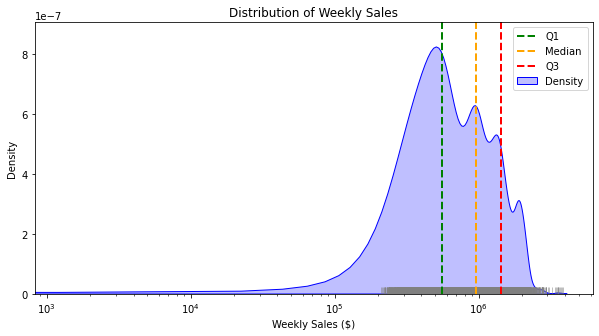

In [13]:
#Let us first analyze the distribution of the target variable

import seaborn as sns
import matplotlib.pyplot as plt

# Extract the target variable
target = 'Weekly_Sales'

# Create the plot
plt.figure(figsize=(10, 5))

# Kernel density estimation plot
sns.kdeplot(df[target], color='blue', shade=True, label='Density')

# Rugplot to show individual data points
sns.rugplot(df[target], color='gray', alpha=0.5)

# Quantile lines
plt.axvline(df[target].quantile(0.25), color='green', linestyle='dashed', linewidth=2, label='Q1')
plt.axvline(df[target].quantile(0.50), color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(df[target].quantile(0.75), color='red', linestyle='dashed', linewidth=2, label='Q3')

# Logarithmic x-axis
plt.xscale('log')

# Labels and title
plt.xlabel('Weekly Sales ($)')
plt.ylabel('Density')
plt.title('Distribution of Weekly Sales')
plt.legend()

# Show the plot
plt.show()


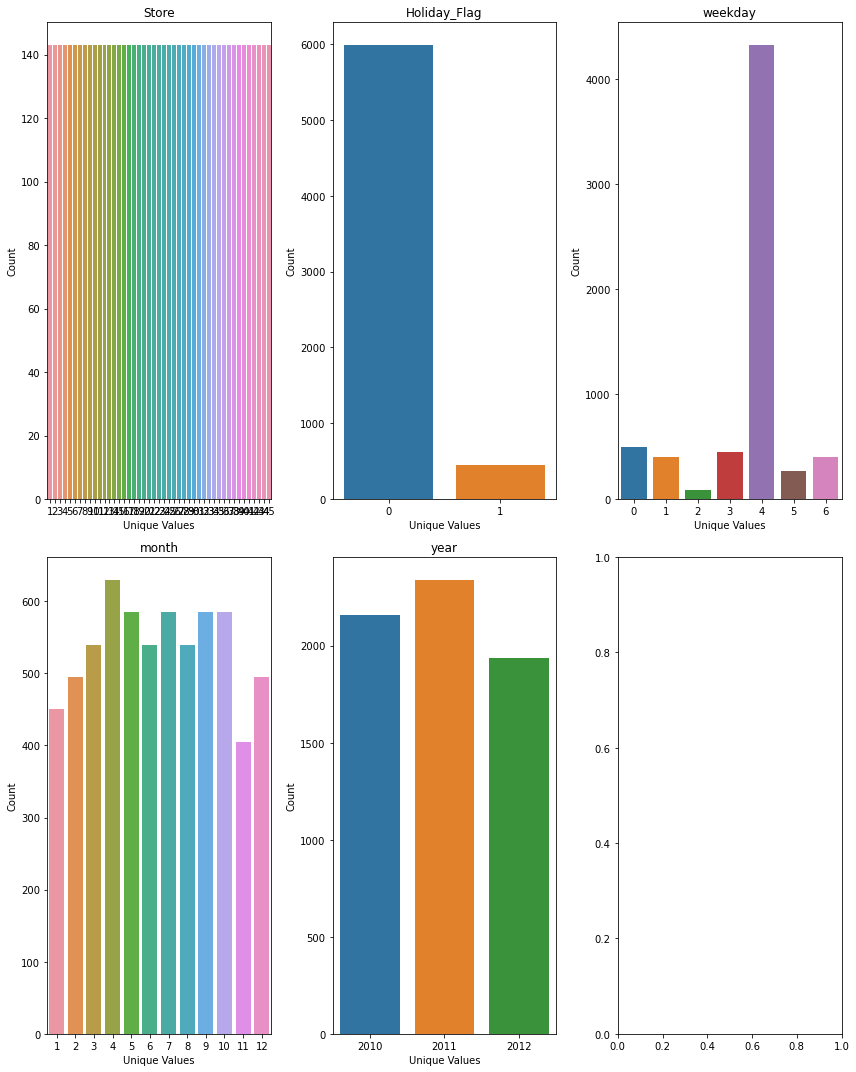

In [14]:
#Visualising the categorical features 

import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of categorical features
categorical_features = df[features].columns[df[features].nunique() <= 45]

# Define the number of rows and columns for subplots
num_rows = math.ceil(len(categorical_features) / 3)
num_cols = 3

# Create the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 15))

# Iterate over categorical features and create subplots
for i, feature in enumerate(categorical_features):
    row = i // num_cols
    col = i % num_cols

    # Create the subplot
    ax = axes[row, col]

    # Countplot for the categorical feature
    sns.countplot(df[feature], ax=ax)

    # Set subplot title and labels
    ax.set_title(feature)
    ax.set_xlabel('Unique Values')
    ax.set_ylabel('Count')

# Adjust subplot layout and display the figure
plt.tight_layout()
plt.show()


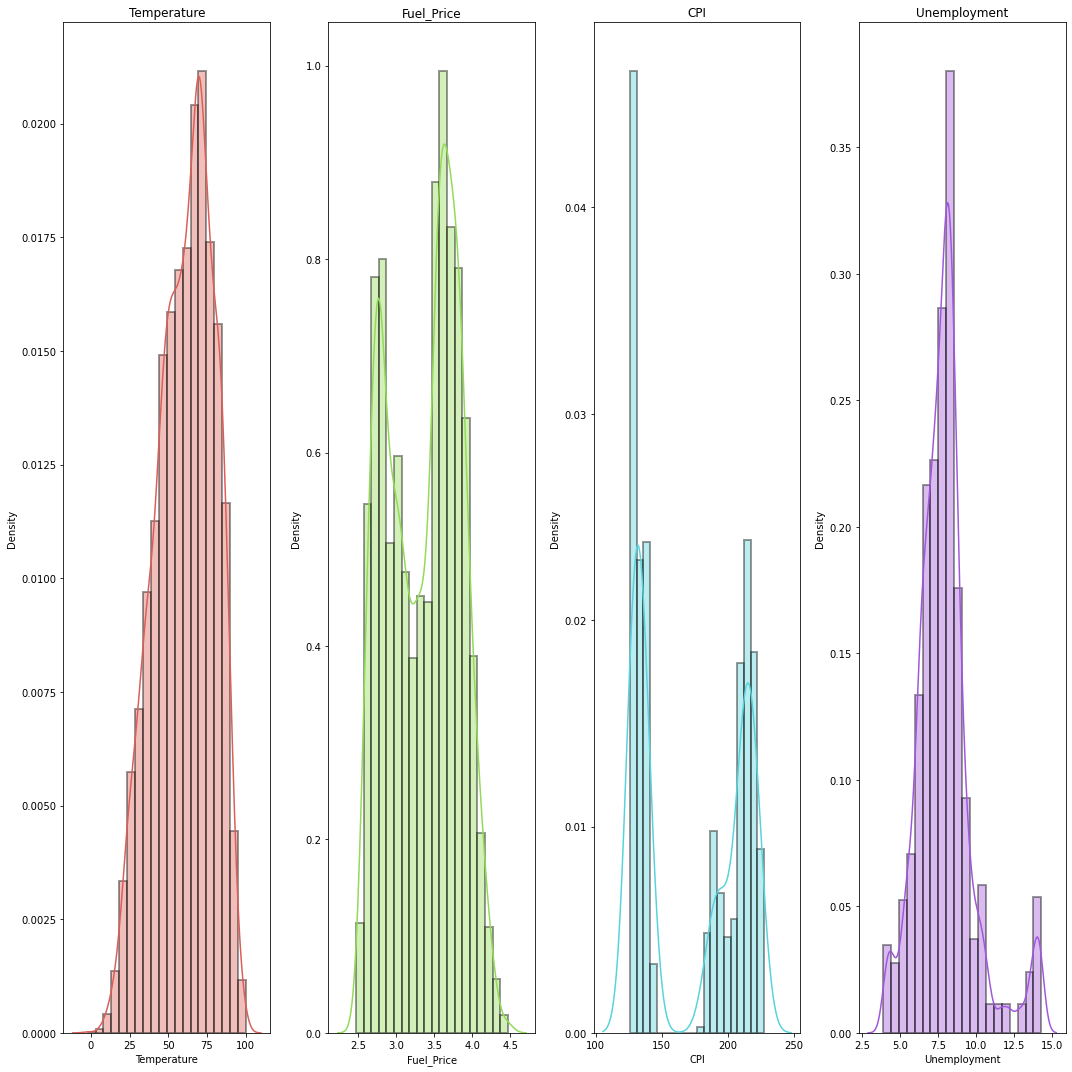

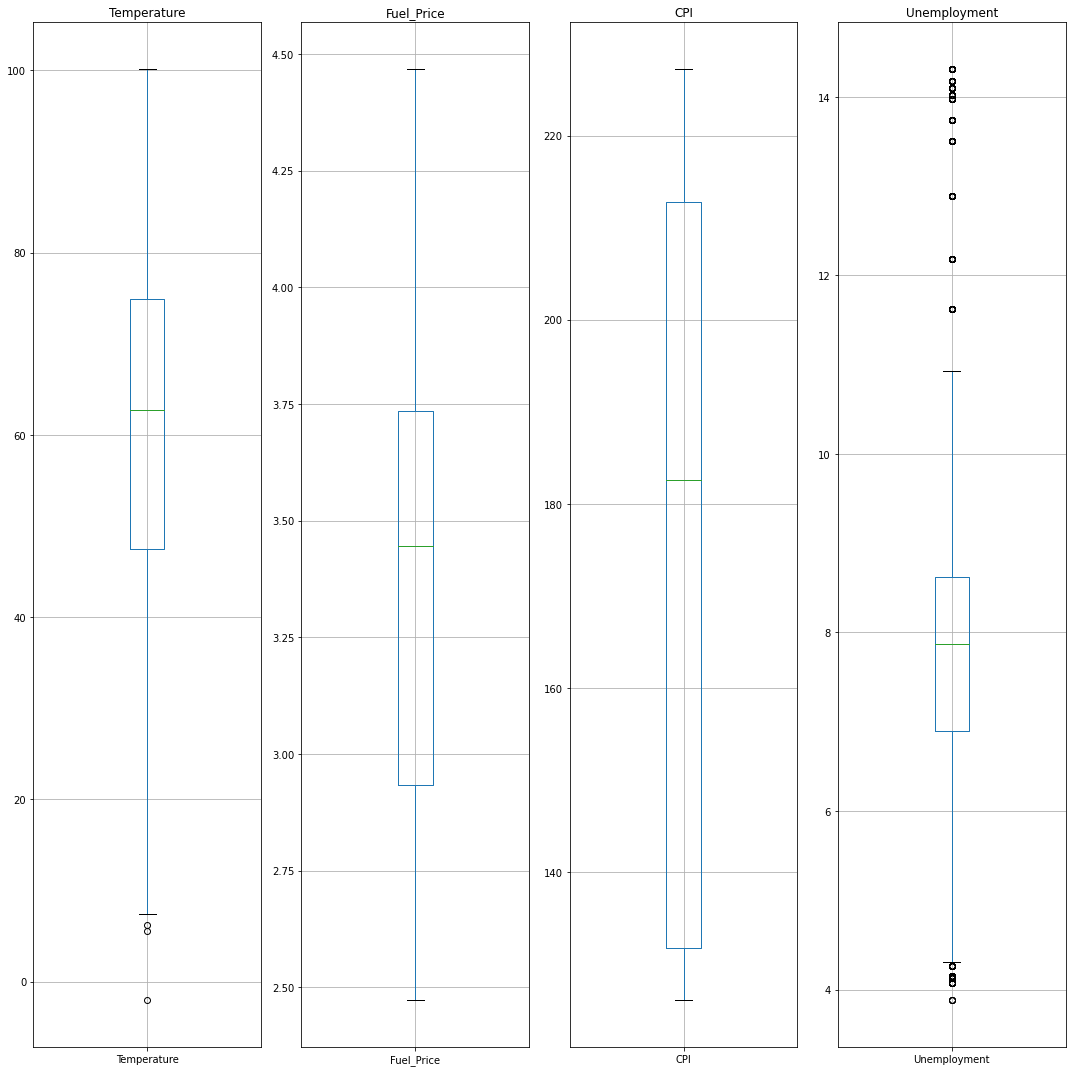

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of numerical features
numerical_features = df[features].columns[df[features].nunique() > 45]

# Define the number of rows and columns for subplots
num_rows = math.ceil(len(numerical_features) / 4)
num_cols = 4

# Color palette for distribution plots
color_palette = sns.color_palette('hls', len(numerical_features))

# Create a figure for distribution plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15), squeeze=False)

# Iterate over numerical features and create distribution plots
for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols

    # Create the subplot
    ax = axes[row, col]

    # Distribution plot with adjusted bin size
    sns.distplot(df[feature], ax=ax, hist_kws=dict(edgecolor="black", linewidth=2), bins=20, color=color_palette[i])

    # Set subplot title and labels
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

# Adjust subplot layout and display the figure
plt.tight_layout()
plt.show()

# Create a figure for boxplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15), squeeze=False)

# Iterate over numerical features and create boxplots
for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols

    # Create the subplot
    ax = axes[row, col]

    # Boxplot with customized aesthetics
    df.boxplot(feature, ax=ax)

    # Set subplot title and labels
    ax.set_title(feature)
    ax.set_xlabel('')

# Tight layout and display
plt.tight_layout()
plt.show()


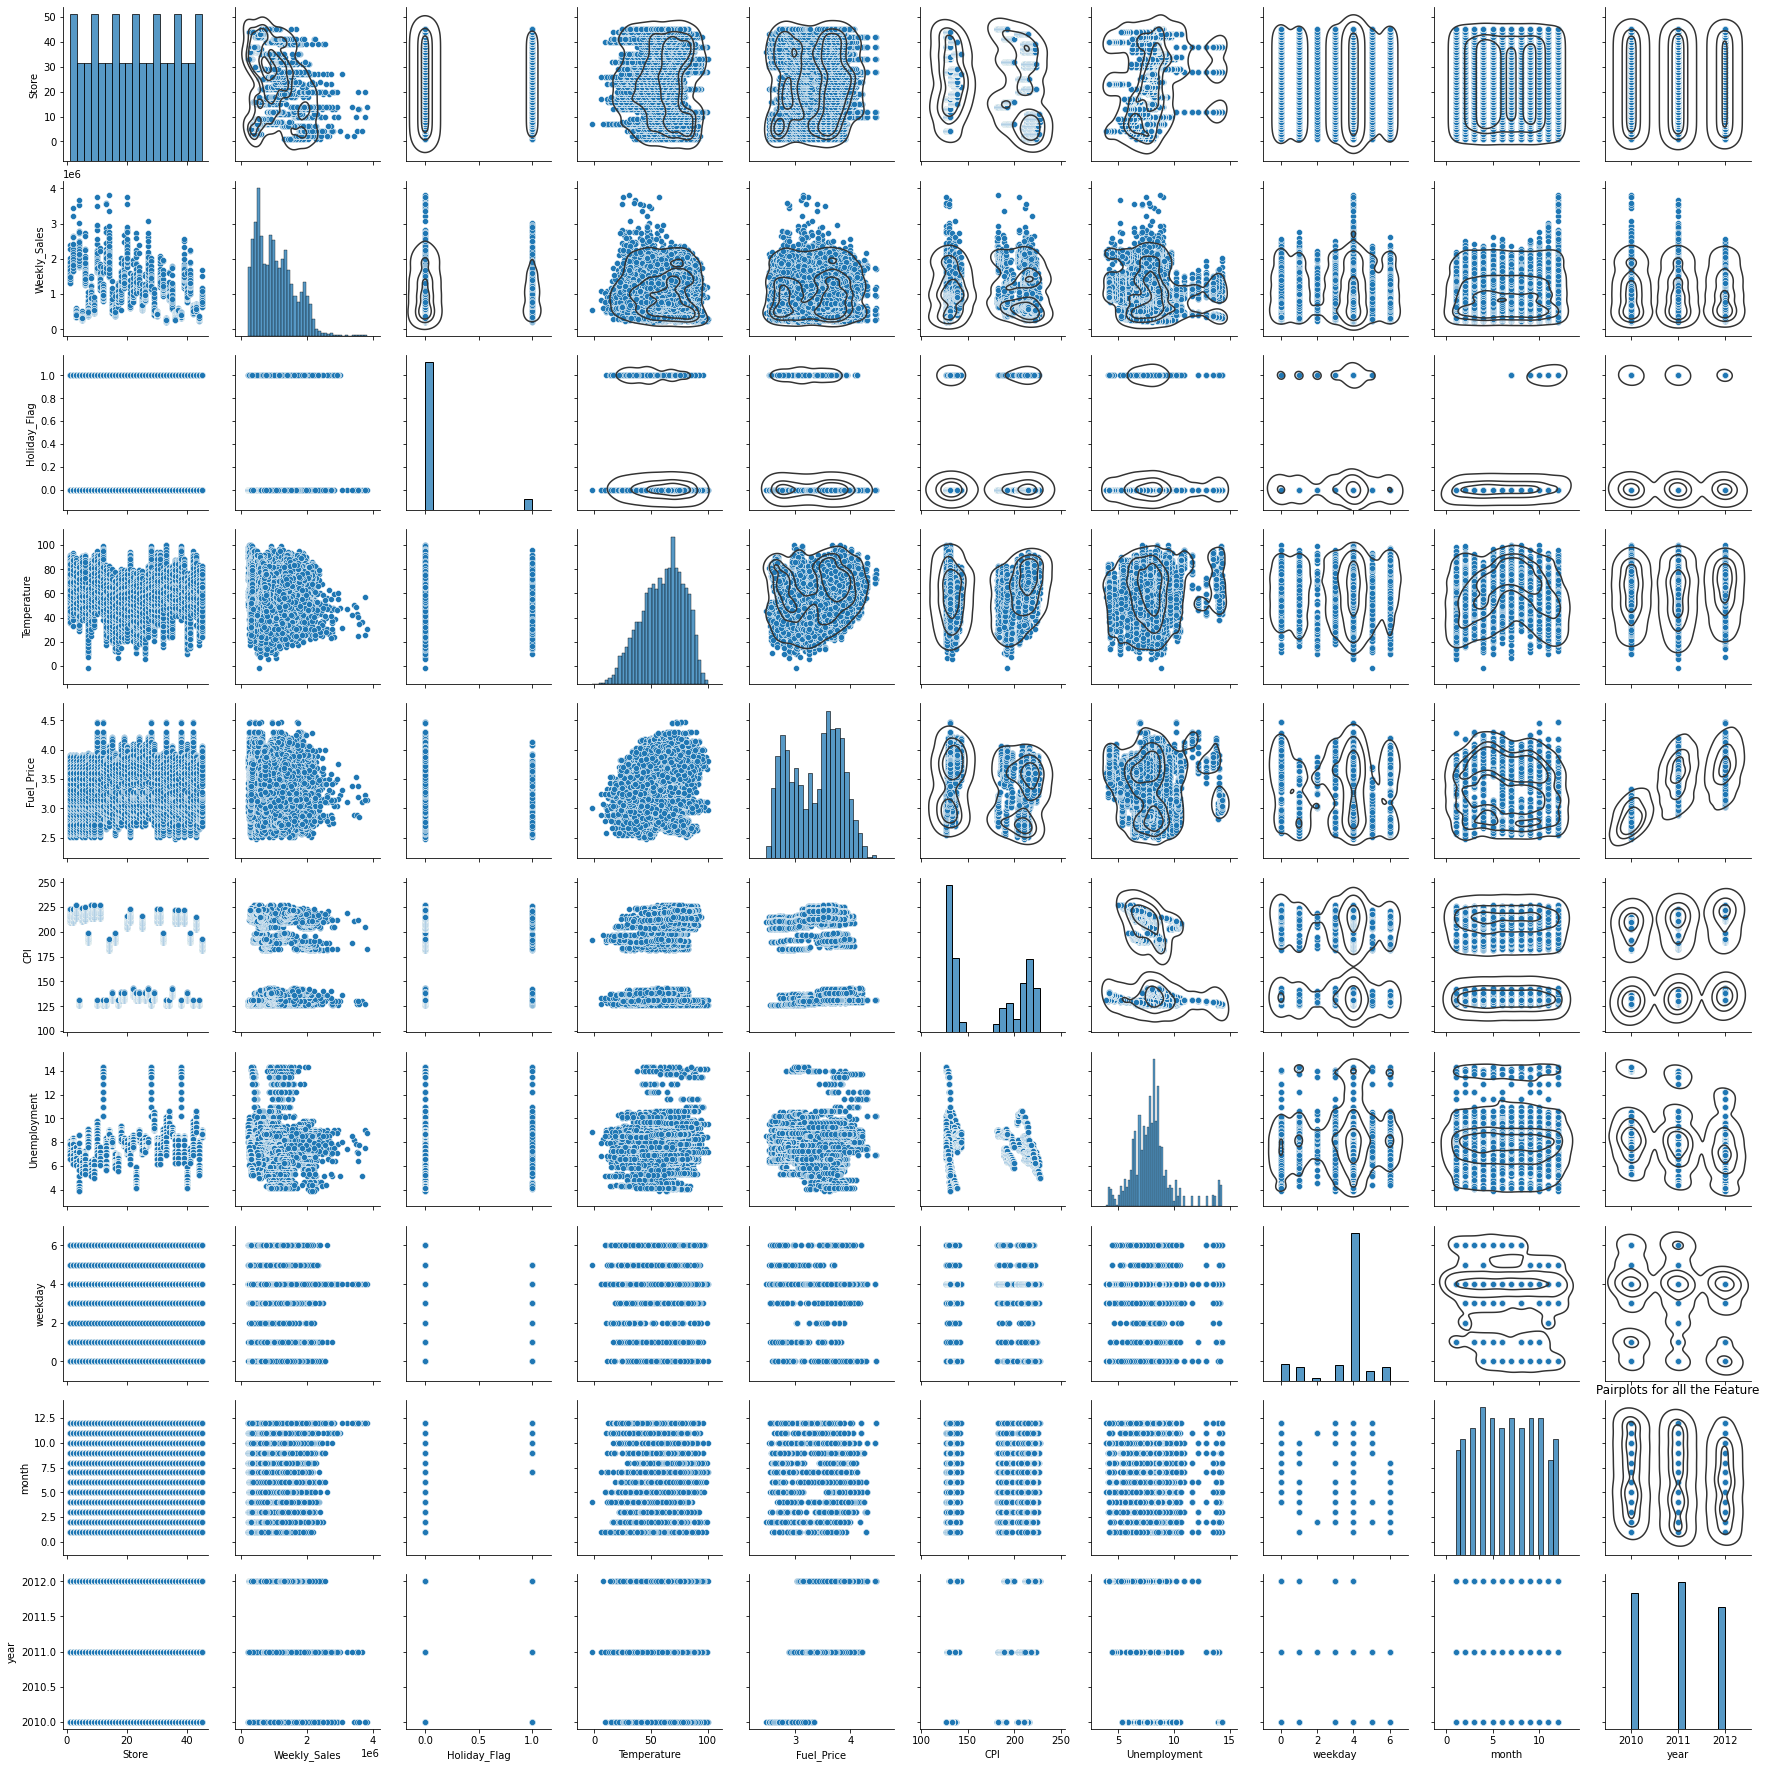

In [16]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

In [17]:
# Create a copy of the original dataframe to preserve the original data
original_df = df.copy(deep=True)

# Check for duplicate rows
duplicates_exist = df.duplicated().any()

# Remove duplicate rows if they exist
if duplicates_exist:
    print('\n\033[1mRemoving duplicate rows...')
    df.drop_duplicates(inplace=True)

    # Calculate the number of duplicates removed
    num_duplicates_removed = original_df.shape[0] - df.shape[0]

    # Print a message indicating the number of duplicates removed
    print(f'\n\033[1mNumber of duplicates removed/fixed: {num_duplicates_removed}')

# If there are no duplicates, print an informative message
else:
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')



Inference: The dataset doesn't have any duplicates


In [18]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

              Total Null Values  Percentage
Store                         0         0.0
Weekly_Sales                  0         0.0
Holiday_Flag                  0         0.0
Temperature                   0         0.0
Fuel_Price                    0         0.0
CPI                           0         0.0
Unemployment                  0         0.0
weekday                       0         0.0
month                         0         0.0
year                          0         0.0


In [19]:
# Check for empty elements
missing_values = df.isnull().sum().reset_index().rename(columns={'index': 'Feature', 0: 'Total Missing Values'})
missing_values['Percentage Missing Values'] = round(missing_values['Total Missing Values'] / df.shape[0], 3) * 100

print(missing_values)


        Feature  Total Missing Values  Percentage Missing Values
0         Store                     0                        0.0
1  Weekly_Sales                     0                        0.0
2  Holiday_Flag                     0                        0.0
3   Temperature                     0                        0.0
4    Fuel_Price                     0                        0.0
5           CPI                     0                        0.0
6  Unemployment                     0                        0.0
7       weekday                     0                        0.0
8         month                     0                        0.0
9          year                     0                        0.0


In [20]:
# Create a copy of the original dataframe
df3 = df.copy()

# Identify categorical columns with non-zero missing values
non_zero_missing_categorical_columns = nvc[nvc['Percentage'] != 0].index.tolist()

# Separate columns for one-hot encoding and dummy encoding
one_hot_columns = [i for i in categorical_features if i in non_zero_missing_categorical_columns and df3[i].nunique() == 2]
dummy_columns = [i for i in categorical_features if i in non_zero_missing_categorical_columns and df3[i].nunique() > 2]

# Perform one-hot encoding for columns with two unique values
if len(one_hot_columns) > 0:
    print("\n\033[1mOne-Hot Encoding on features:")
    for col in one_hot_columns:
        print(col)
        df3[col] = pd.get_dummies(df3[col], drop_first=True, prefix=col)

# Perform dummy encoding for columns with more than two unique values
if len(dummy_columns) > 0:
    print("\n\033[1mDummy Encoding on features:")
    for col in dummy_columns:
        print(col)
        df3 = pd.concat([df3.drop([col], axis=1), pd.DataFrame(pd.get_dummies(df3[col], drop_first=True, prefix=col))], axis=1)

print(df3.shape)


(6435, 10)


##  <font color = 'blue'> 2. IQR Outlier Removal </font>



In [21]:
# Create a copy of the original dataframe
df1 = df3.copy()

# Define features for outlier removal
features1 = numerical_features

# Remove outliers using IQR method
for col in features1:
    # Calculate IQR more efficiently
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3 - q1

    # Filter data within 1.5 IQR of quartiles
    df1 = df1[df1[col] <= (q3 + 1.5 * iqr)]
    df1 = df1[df1[col] >= (q1 - 1.5 * iqr)]

    # Reset index after each filtering
    df1 = df1.reset_index(drop=True)

# Display the head of the processed dataset
display(df1.head())

# Print informative messages about outlier removal
print("\n\033[1mInference:\033[0m\nBefore outlier removal, the dataset had {} samples.".format(df3.shape[0]))
print("After outlier removal, the dataset now has {} samples.".format(df1.shape[0]))


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010



Inference:
Before outlier removal, the dataset had 6435 samples.
After outlier removal, the dataset now has 5951 samples.


##  <font color = 'blue'> 3. PCA feature elimination </font>



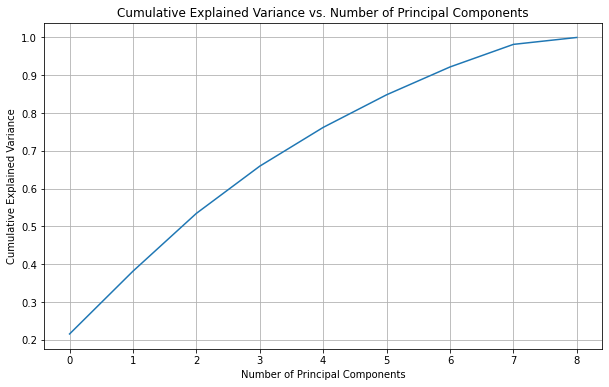

Number of components to retain 95.0% variance: 8
Selected features using RFE: Index(['Store', 'Fuel_Price', 'CPI', 'month', 'year'], dtype='object')


In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df1 is the dataframe after outlier removal
# Extract features and target variable
X = df1.drop(target, axis=1)
y = df1[target]

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Task 1: Code Review
# Creating and fitting the PCA object
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Task 2: Exploration of Explained Variance
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

# Task 3: Threshold Adjustment
# Evaluate the explained variance ratio for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

# Choose a threshold, e.g., 0.95 for retaining 95% of the variance
threshold = 0.95
cumulative_variance = 0
num_components_to_keep = 0

for i, explained_variance_ratio in enumerate(explained_variance_ratios):
    cumulative_variance += explained_variance_ratio
    if cumulative_variance >= threshold:
        num_components_to_keep = i + 1
        break

print(f"Number of components to retain {threshold * 100}% variance: {num_components_to_keep}")

# Retain only the selected number of components
pca = PCA(n_components=num_components_to_keep)
X_pca = pca.fit_transform(X_scaled)

# Task 4: Alternative Approaches
# Research and propose alternative methods for feature elimination
# (e.g., Recursive Feature Elimination, L1 regularization, etc.)

# Example of Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Create the RFE model and select the number of features to retain
num_features_to_retain = 5
rfe = RFE(model, num_features_to_retain)
X_rfe = rfe.fit_transform(X_scaled, y)

# Display the selected features
selected_features = X.columns[rfe.support_]
print("Selected features using RFE:", selected_features)

##  <font color = 'blue'> Data Frame for Hamid </font>



In [23]:
# Create a new DataFrame with the selected principal components
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(num_components_to_keep)])

# Provide df_pca to the Hamid for building models

In [24]:
# Print explained variance ratio for each principal component
explained_variance_ratios = pca.explained_variance_ratio_
for i, explained_variance_ratio in enumerate(explained_variance_ratios):
    print(f"Explained Variance Ratio for PC{i+1}: {explained_variance_ratio:.3f}")

# Print contributions of original features to each principal component
component_names = [f'PC{i+1}' for i in range(num_components_to_keep)]
components_df = pd.DataFrame(pca.components_, columns=X.columns, index=component_names)

# Display the DataFrame with feature contributions to each principal component
print("\nContributions of Original Features to Principal Components:")
print(components_df)

Explained Variance Ratio for PC1: 0.215
Explained Variance Ratio for PC2: 0.166
Explained Variance Ratio for PC3: 0.153
Explained Variance Ratio for PC4: 0.125
Explained Variance Ratio for PC5: 0.103
Explained Variance Ratio for PC6: 0.086
Explained Variance Ratio for PC7: 0.074
Explained Variance Ratio for PC8: 0.060

Contributions of Original Features to Principal Components:
        Store  Holiday_Flag  Temperature  Fuel_Price       CPI  Unemployment  \
PC1  0.094392      0.179465    -0.192271   -0.610160 -0.102346      0.289255   
PC2 -0.562630      0.109421     0.130043   -0.270496  0.559090     -0.481341   
PC3  0.073459      0.612557    -0.147198    0.189076 -0.131311     -0.044929   
PC4 -0.252121      0.087531    -0.784865   -0.016553 -0.296772     -0.348968   
PC5  0.045697     -0.327833    -0.076575   -0.156150  0.043421      0.042841   
PC6  0.522159      0.343275    -0.244207   -0.101086  0.631668      0.047084   
PC7 -0.557756      0.370169     0.051829    0.101859  0.051

##### The results of Principal Component Analysis (PCA) provide valuable insights into the data reduction process.

- The explained variance ratios for each principal component (PC) indicate the proportion of the total variance captured by that component.
- For example, PC1 explains approximately 21.5% of the total variance, followed by PC2 with 16.6%, and so on. - Examining the contributions of the original features to each PC reveals the key factors influencing the components.
- Notably, PC1 is influenced by factors like 'Holiday_Flag,' 'Unemployment,' and 'year,' while PC2 shows strong negative contributions from 'Store,' 'CPI,' and 'Unemployment.'
- Understanding these contributions aids in comprehending the significance of each PC and guides feature selection for subsequent modeling tasks.
- It's important to note that the cumulative explained variance provides a holistic view of the data's information retention, assisting in determining the optimal number of principal components to retain for modeling purposes.

##  <font color = 'blue'> Hamid's code start </font>



In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

In [28]:
y = df1['Weekly_Sales']
X = df_pca
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4760, 8)
(1191, 8)
(4760,)
(1191,)


In [29]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
print(f"Training r^2: {linear_model.score(X_train,y_train):.4f}")
print(f"Test r^2: {linear_model.score(X_test,y_test):.4f}")

Training r^2: 0.1394
Test r^2: 0.1188


In [30]:
# Based on the difference between the training and test sets, we have an overfitting. So we use the GridSearchCV to prevent the overfitting and run
# the random forest model again.
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
print(f"Training r^2: {rf_model.score(X_train,y_train):.4f}")
print(f"Test r^2: {rf_model.score(X_test,y_test):.4f}")

Training r^2: 0.9340
Test r^2: 0.5455


In [31]:
linear_model = Lasso()
linear_model.fit(X_train,y_train)
print(f"Training r^2: {linear_model.score(X_train,y_train):.4f}")
print(f"Test r^2: {linear_model.score(X_test,y_test):.4f}")

Training r^2: 0.1394
Test r^2: 0.1188


In [32]:
# random forest hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators":[50,100,200],
             "max_depth":[2,5,8],
             "min_samples_split":[4,8,12]}
rf_cv = GridSearchCV(rf_model, param_grid = param_grid, verbose = 1)
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  1.8min finished


{'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 50}


In [33]:
# Now we use the best parameters obtained from the GridSearchCV to improve our test set performance in Random Forest.
rf_model = RandomForestRegressor(max_depth = 18, min_samples_split = 2, n_estimators = 200)
rf_model.fit(X_train,y_train)
print(f"Training r^2: {rf_model.score(X_train,y_train):.4f}")
print(f"Test r^2: {rf_model.score(X_test,y_test):.4f}")

Training r^2: 0.9160
Test r^2: 0.5385


In [34]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators = 1000, subsample = 0.9, learning_rate = 0.05, min_samples_split = 4 )
gb_model.fit(X_train,y_train)
print(f"Training r^2: {gb_model.score(X_train,y_train):.4f}")
print(f"Test r^2: {gb_model.score(X_test,y_test):.4f}")

Training r^2: 0.6814
Test r^2: 0.3832


In [ ]:
# GradientBoos hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators":[200,300],
             "max_depth":[8,12, 16],
             "min_samples_split":[3, 5, 7],
             "learning_rate":[0.05, 0.1],
              }
gb_cv = GridSearchCV(gb_model, param_grid = param_grid, verbose = 2)
gb_cv.fit(X_train, y_train)
print(gb_cv.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=200, total=   3.2s
[CV] learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=200, total=   3.1s
[CV] learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=200, total=   3.2s
[CV] learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=200, total=   3.1s
[CV] learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=200, total=   3.2s
[CV] learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, total=   4.8s
[CV] learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, total=   4.7s
[CV] learning_rate=0.05, max_depth=8, min_samples_split=3, n_es

[CV]  learning_rate=0.05, max_depth=12, min_samples_split=7, n_estimators=200, total=   4.4s
[CV] learning_rate=0.05, max_depth=12, min_samples_split=7, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=12, min_samples_split=7, n_estimators=200, total=   4.5s
[CV] learning_rate=0.05, max_depth=12, min_samples_split=7, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=12, min_samples_split=7, n_estimators=200, total=   4.4s
[CV] learning_rate=0.05, max_depth=12, min_samples_split=7, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=12, min_samples_split=7, n_estimators=200, total=   4.3s
[CV] learning_rate=0.05, max_depth=12, min_samples_split=7, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=12, min_samples_split=7, n_estimators=200, total=   4.3s
[CV] learning_rate=0.05, max_depth=12, min_samples_split=7, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=12, min_samples_split=7, n_estimators=300, total=   6.5s
[CV] learning_rate=0.05, max_depth=12, min_samples_s

In [ ]:
# for time series we also need names for the rows, and the row in panda is called index. with df.set_index("Date", inplace = True)
# we set name for the rows also
df = pd.read_csv('Walmart.csv')
df["Date"] = pd.to_datetime(df["Date"], dayfirst = True)
df = df.sort_values(by = 'Date', ascending = True)
df.set_index("Date", inplace = True)
df_week = df.resample("W").mean()
df_week_diff = df_week["Weekly_Sales"].diff().dropna()
train_data_diff = df_week_diff[:int(0.8*len(df_week_diff))]
test_data_diff = df_week_diff[int(0.8*len(df_week_diff)):]
train_data = df[:int(0.8*len(df_week_diff))]
test_data = df[int(0.8*len(df_week_diff)):]
X_train = train_data.iloc[:, 2:]
X_test = test_data.iloc[:, 2:]
y_train = train_data["Weekly_Sales"]
y_test = test_data["Weekly_Sales"]

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
                                           trend='additive',damped=True).fit() #Taking additive trend and seasonality.
y_pred = model_holt_winters.forecast(len(test_data_diff))# Predict the test data

#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [ ]:
# weighting the results whether it is holiday or not. So applies bigger penalty being off on holiday
# and applies less penalty being off on non holiday
def wmae_test(test, pred):
    weights = X_test['Holiday_Flag'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

In [ ]:
wmae_test(test_data_diff, y_pred)

In [ ]:
X_test.head()

In [ ]:
train_data.head()

In [ ]:
svm = SVC(kernel='linear', C=1000, random_state=1)
svm.fit(X_train, y_train)

plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_11.png', dpi=300)
plt.show()

##  <font color = 'blue'> Hamid's code end </font>

##  <font color = 'blue'> 4. Missing Values Imputation for Data Preprocessing </font>



In [25]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Assuming df_pca is your DataFrame

# 1. Missing Values Assessment
# Identify features with missing values in the dataset
features_with_missing_values = df_pca.columns[df_pca.isnull().any()].tolist()

# Quantify the extent of missing data for each relevant feature
missing_values_summary = df_pca[features_with_missing_values].isnull().sum()
missing_values_percentage = (missing_values_summary / len(df_pca)) * 100

# Print missing values summary
print("\nFeatures with Missing Values:")
print(features_with_missing_values)
print("\nMissing Values Summary:")
print(missing_values_summary)
print("\nMissing Values Percentage:")
print(missing_values_percentage)

# 2. Imputation Techniques
# Create separate lists for numeric and non-numeric features
numeric_features = df_pca.select_dtypes(include=['number']).columns.tolist()
non_numeric_features = df_pca.select_dtypes(exclude=['number']).columns.tolist()

# Imputation strategy for numeric features
numeric_imputation_strategy = 'mean'
numeric_imputer = SimpleImputer(strategy=numeric_imputation_strategy)

# Imputation strategy for non-numeric features
non_numeric_imputation_strategy = 'most_frequent'
non_numeric_imputer = SimpleImputer(strategy=non_numeric_imputation_strategy)

# 3. Implementation
# Impute missing values for numeric features
df_pca_imputed = df_pca.copy()
df_pca_imputed[numeric_features] = numeric_imputer.fit_transform(df_pca[numeric_features])

# Impute missing values for non-numeric features
# Check if there are non-numeric features with missing values
if len(non_numeric_features) > 0:
    df_pca_imputed[non_numeric_features] = non_numeric_imputer.fit_transform(df_pca[non_numeric_features])
    df_pca_imputed[non_numeric_features] = df_pca_imputed[non_numeric_features].astype(df_pca[non_numeric_features].dtypes)  # Ensure data types are maintained

# Ensure documentation is updated to reflect the imputation process

# 4. Evaluation
# Assess the impact of imputation on the dataset statistics and distribution
print("\nDataset Statistics Before Imputation:")
print(df_pca.describe())

print("\nDataset Statistics After Imputation:")
print(df_pca_imputed.describe())

# Compare the model performance before and after imputation
# Assuming you have a target variable named 'target_column'
# If your target variable is not directly available, you should modify this part accordingly

# Before imputation
if 'target_column' in df_pca.columns:
    X_train, X_test, y_train, y_test = train_test_split(df_pca.drop('target_column', axis=1), df_pca['target_column'], test_size=0.2, random_state=42)
    model_before_imputation = RandomForestRegressor(random_state=42)
    model_before_imputation.fit(X_train, y_train)
    predictions_before_imputation = model_before_imputation.predict(X_test)
    mae_before_imputation = mean_absolute_error(y_test, predictions_before_imputation)

# After imputation
if 'target_column' in df_pca_imputed.columns:
    X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(df_pca_imputed.drop('target_column', axis=1), df_pca_imputed['target_column'], test_size=0.2, random_state=42)
    model_after_imputation = RandomForestRegressor(random_state=42)
    model_after_imputation.fit(X_train_imputed, y_train_imputed)
    predictions_after_imputation = model_after_imputation.predict(X_test_imputed)
    mae_after_imputation = mean_absolute_error(y_test_imputed, predictions_after_imputation)

# Print model performance comparison
if 'target_column' in df_pca.columns and 'target_column' in df_pca_imputed.columns:
    print("\nModel Performance Comparison:")
    print(f"MAE Before Imputation: {mae_before_imputation}")
    print(f"MAE After Imputation: {mae_after_imputation}")



Features with Missing Values:
[]

Missing Values Summary:
Series([], dtype: float64)

Missing Values Percentage:
Series([], dtype: float64)

Dataset Statistics Before Imputation:
                PC1           PC2           PC3           PC4           PC5  \
count  5.951000e+03  5.951000e+03  5.951000e+03  5.951000e+03  5.951000e+03   
mean  -9.025809e-17  1.064329e-15  5.803905e-17  1.280553e-16 -9.178789e-18   
std    1.392054e+00  1.223153e+00  1.173459e+00  1.060769e+00  9.606365e-01   
min   -2.680980e+00 -2.907262e+00 -2.693657e+00 -3.150559e+00 -2.319460e+00   
25%   -1.216303e+00 -9.445284e-01 -7.633342e-01 -7.609184e-01 -4.860793e-01   
50%   -2.198292e-01 -8.074804e-02 -2.235510e-01 -7.822855e-02 -1.648971e-01   
75%    1.335547e+00  8.733615e-01  4.273806e-01  7.198429e-01  2.762972e-01   
max    3.598092e+00  2.979798e+00  4.392156e+00  3.663581e+00  2.916130e+00   

                PC6           PC7           PC8  
count  5.951000e+03  5.951000e+03  5.951000e+03  
mean  -4

As per output above, it seems that there were no missing values in the dataset before imputation. Therefore, the imputation process did not change the dataset, and the statistics before and after imputation are identical.


Features with Missing Values:
- None of the features had missing values.

Missing Values Summary:
- There were no missing values in any feature.

Missing Values Percentage:
- The percentage of missing values for all features was 0%.

Dataset Statistics Before Imputation:

- The dataset had a total of 5,951 samples.
- The principal components (PC1 to PC8) had mean values close to zero, standard deviations varying across components, and minimum and maximum values within reasonable ranges.

Dataset Statistics After Imputation:
- After imputation, the dataset remained unchanged as there were no missing values to impute.

In summary, since there were no missing values initially, the imputation process had no effect on the dataset. It's always a good practice to check for missing values and perform imputation if needed, but in this case, it wasn't necessary.

In [26]:
# Convert the numeric columns to appropriate data types
numeric_columns = df_combined.select_dtypes(include=['number']).columns
df_combined[numeric_columns] = df_combined[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Visualize the distribution of features before and after imputation
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")

# Melt the DataFrame to long format for better plotting
df_melted = pd.melt(df_combined, id_vars=['Imputation'], value_vars=df_pca.columns, var_name='Feature', value_name='Value')

# Plotting box plots for each feature before and after imputation
sns.boxplot(x='Feature', y='Value', hue='Imputation', data=df_melted)
plt.title('Distribution of Features Before and After Imputation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

NameError: name 'df_combined' is not defined

##  <font color = 'blue'> 5. Implementation of Cross-Validation for Model Selection </font>

In [ ]:
# Assuming df_pca_imputed is the DataFrame after PCA and missing values imputation
# If df_pca_imputed is not directly available, you should modify this part accordingly

# Assuming 'target_column' is the target variable for modeling
# If your target variable has a different name, make sure to modify this part accordingly

# 1. Current Model Evaluation Review
# Understand the existing methods used for evaluating regression models (R2 and RMSE scores)
# Document the strengths and limitations of the current evaluation process

def evaluate_model(model, X, y_true):
    y_pred = model.predict(X)
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# 2. Cross-Validation Implementation
# Research and choose a suitable cross-validation technique (e.g., k-fold cross-validation)
# Implement cross-validation in the model selection phase

# Assuming 'your_model' is the model you want to use for cross-validation
# If you are using a different model, replace 'your_model' with the actual model

model = RandomForestRegressor(random_state=42)  # Replace with your actual model

# Choose a suitable cross-validation technique (e.g., k-fold cross-validation)
# In this example, we use 5-fold cross-validation
cv_results = cross_val_score(model, df_pca_imputed.drop('target_column', axis=1), df_pca_imputed['target_column'],
                             scoring=make_scorer(mean_squared_error), cv=5)

# 3. Performance Metrics Comparison
# Compare the results obtained through cross-validation with the previous evaluation metrics
# Assess the impact of cross-validation on model performance

# Evaluate the model on the entire dataset for comparison
rmse_before_cv, r2_before_cv = evaluate_model(model, df_pca_imputed.drop('target_column', axis=1), df_pca_imputed['target_column'])

# Display results
print("\nModel Evaluation Before Cross-Validation:")
print(f"RMSE: {rmse_before_cv}")
print(f"R2: {r2_before_cv}")

# Display cross-validation results
print("\nCross-Validation Results:")
print("Mean RMSE:", cv_results.mean())
print("Std RMSE:", cv_results.std())

# 4. Documentation
# Update the project's README with details on the implemented cross-validation process
# Provide insights into how cross-validation enhances the reliability of model evaluation

# Add relevant information to your README file about the chosen cross-validation technique and its impact